In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
from geopy.geocoders import Nominatim
from os import getenv
from dotenv import load_dotenv, find_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load environment variables

load_dotenv(find_dotenv())
EMAIL = getenv("EMAIL")
PASSWORD = getenv("PASSWORD")


In [3]:
s = Service('/mnt/c/Users/kekek/development/chromedriver.exe')
driver = webdriver.Chrome(service=s)

In [4]:
# Login to Boxrec and scraping Canelos fights information

driver.get("https://boxrec.com/")
driver.find_element(By.XPATH,'//*[@id="username"]').send_keys(EMAIL)
driver.find_element(By.XPATH,'//*[@id="password"]').send_keys(PASSWORD)
driver.find_element(By.XPATH,'//*[@id="pageOuter"]/div/div[3]/form/div[4]/button').click()
driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div/div[2]/div/button[2]').click()
driver.find_element(By.XPATH,'//*[@id="si_search_text"]').send_keys('Saul Alvarez')
driver.find_element(By.XPATH,'//*[@id="go"]').click()
driver.get(driver.find_element(By.CLASS_NAME,"personLink").get_attribute("href"))

fights_info = driver.find_elements(By.CLASS_NAME,"dataTable")[1].find_elements(By.TAG_NAME, "td")


In [5]:
# Matching the information with the columns

dictionary = {"date": fights_info[1].text,
            "weight_canelo": fights_info[2].text,
            "opponent": fights_info[5].text,
            "opponent_weight": fights_info[6].text,
            "arena": fights_info[10].text,
            "result_canelo":fights_info[11].text,
            "result":fights_info[12].text,
            "rounds":fights_info[13].text
}

In [6]:
print(dictionary)

{'date': '2021-11-06', 'weight_canelo': '168', 'opponent': 'Caleb Plant', 'opponent_weight': '167', 'arena': 'MGM Grand, Grand Garden Arena, Las Vegas', 'result_canelo': 'W', 'result': 'TKO', 'rounds': '11/12'}


In [7]:
# Creating a list with the information

canelo_fights_1 = []
a=1
b=2
c=5
d=6
e=10
f=11
g=12
h=13 
for x in range(1,46):
    if len(fights_info[a].text) == 10:

        dictionary = {"date": fights_info[a].text,
                    "weight_canelo": fights_info[b].text,
                    "opponent": fights_info[c].text,
                    "opponent_weight": fights_info[d].text,
                    "arena": fights_info[e].text,
                    "result_canelo":fights_info[f].text,
                    "result":fights_info[g].text,
                    "rounds":fights_info[h].text
        }
    else: 
        dictionary = {"date": fights_info[a+1].text,
                    "weight_canelo": fights_info[b+1].text,
                    "opponent": fights_info[c+1].text,
                    "opponent_weight": fights_info[d+1].text,
                    "arena": fights_info[e+1].text,
                    "result_canelo":fights_info[f+1].text,
                    "result":fights_info[g+1].text,
                    "rounds":fights_info[h+1].text
        }            
    a+=17
    b+=17
    c+=17
    d+=17
    e+=17
    f+=17
    g+=17
    h+=17

    canelo_fights_1.append(dictionary)


In [8]:
df_canelo_fights_1 = pd.DataFrame(canelo_fights_1)
df_canelo_fights_1.head()

,date,weight_canelo,opponent,opponent_weight,arena,result_canelo,result,rounds
0,2021-11-06,168,Caleb Plant,167,"MGM Grand, Grand Garden Arena, Las Vegas",W,TKO,11/12
1,2021-05-08,167½,Billy Joe Saunders,167¾,"AT&T Stadium, Arlington",W,RTD,8/12
2,2021-02-27,167½,Avni Yildirim,167½,"Hard Rock Stadium, Miami Gardens",W,RTD,3/12
3,2020-12-19,168,Callum Smith,168,"Alamodome, San Antonio",W,UD,12/12
4,2019-11-02,174½,Sergey Kovalev,175,"MGM Grand, Grand Garden Arena, Las Vegas",W,KO,11/12


In [9]:
# In certain point data does not follow the same pattern, so it is necessary to create a new chunk of code

canelo_fights_2 = []
a=765
b=766
c=769
d=770
e=774
f=775
g=776
h=777

for x in range(46,61):
    if len(fights_info[a].text) == 10:

        dictionary = {"date": fights_info[a].text,
                    "weight_canelo": fights_info[b].text,
                    "opponent": fights_info[c].text,
                    "opponent_weight": fights_info[d].text,
                    "arena": fights_info[e].text,
                    "result_canelo":fights_info[f].text,
                    "result":fights_info[g].text,
                    "rounds":fights_info[h].text
        }
    else:
        a+=1
        b+=1
        c+=1
        d+=1
        e+=1
        f+=1
        g+=1
        h+=1
        dictionary = {"date": fights_info[a].text,
                    "weight_canelo": fights_info[b].text,
                    "opponent": fights_info[c].text,
                    "opponent_weight": fights_info[d].text,
                    "arena": fights_info[e].text,
                    "result_canelo":fights_info[f].text,
                    "result":fights_info[g].text,
                    "rounds":fights_info[h].text
        }
    a+=16
    b+=16
    c+=16
    d+=16
    e+=16
    f+=16
    g+=16
    h+=16
    canelo_fights_2.append(dictionary)


In [10]:
df_canelo_fights_2 = pd.DataFrame(canelo_fights_2)
df_canelo_fights_2.head()

,date,weight_canelo,opponent,opponent_weight,arena,result_canelo,result,rounds
0,2007-08-31,147,Ricardo Cano,147,"Coliseo Olimpico de la UG, Guadalajara",W,UD,12/12
1,2007-08-18,151,Christian Solano,151,"Coliseo Olimpico de la UG, Guadalajara",W,UD,10/10
2,2007-06-01,,Jesus Abel Hernandez,,"Salón de Eventos Los Fresnos, Tepic",W,TKO,2/10
3,2007-05-19,147¾,Victor Emilio Marquez,147¾,"Auditorio Benito Juarez, Guadalajara",W,KO,4/10
4,2007-03-30,,Ivan Illescas,,"Salón de Eventos Los Fresnos, Tepic",W,KO,4/10


In [11]:
# Closing the browser
driver.quit()

In [12]:
# Creating a single data frame with all the information
df_canelo_fights = df_canelo_fights_1.append(df_canelo_fights_2)
df_canelo_fights.reset_index()
df_canelo_fights.head()

,date,weight_canelo,opponent,opponent_weight,arena,result_canelo,result,rounds
0,2021-11-06,168,Caleb Plant,167,"MGM Grand, Grand Garden Arena, Las Vegas",W,TKO,11/12
1,2021-05-08,167½,Billy Joe Saunders,167¾,"AT&T Stadium, Arlington",W,RTD,8/12
2,2021-02-27,167½,Avni Yildirim,167½,"Hard Rock Stadium, Miami Gardens",W,RTD,3/12
3,2020-12-19,168,Callum Smith,168,"Alamodome, San Antonio",W,UD,12/12
4,2019-11-02,174½,Sergey Kovalev,175,"MGM Grand, Grand Garden Arena, Las Vegas",W,KO,11/12


In [13]:
df_canelo_fights.shape

(60, 8)

In [14]:
# Cleaning the data frame from special characters

df_canelo_fights.opponent = df_canelo_fights.opponent.apply(lambda x: x.replace(" *",""))
modify_weight = {"½": ".5",
                "¼":".25",
                "¾":".75",
}
for idx in modify_weight:
    df_canelo_fights.weight_canelo = df_canelo_fights.weight_canelo.apply(lambda x: x.replace(idx,modify_weight[idx]))
    df_canelo_fights.opponent_weight = df_canelo_fights.opponent_weight.apply(lambda x: x.replace(idx,modify_weight[idx]))
df_canelo_fights.head()

,date,weight_canelo,opponent,opponent_weight,arena,result_canelo,result,rounds
0,2021-11-06,168,Caleb Plant,167,"MGM Grand, Grand Garden Arena, Las Vegas",W,TKO,11/12
1,2021-05-08,167.5,Billy Joe Saunders,167.75,"AT&T Stadium, Arlington",W,RTD,8/12
2,2021-02-27,167.5,Avni Yildirim,167.5,"Hard Rock Stadium, Miami Gardens",W,RTD,3/12
3,2020-12-19,168,Callum Smith,168,"Alamodome, San Antonio",W,UD,12/12
4,2019-11-02,174.5,Sergey Kovalev,175,"MGM Grand, Grand Garden Arena, Las Vegas",W,KO,11/12


In [15]:
# Some addresses are not in the correct format, so it is necessary to replace them

corrected_addresses = {"Mandalay Bay Hotel & Casino Events Center Las Vegas" : "Las Vegas",
                    "Monumental Plaza de Toros México Mexico City" : "Mexico City",
                    "Arena VFG Guadalajara" : "Guadalajara Mexico",
                    "Palenque de la Feria Tuxtla Gutierrez" : "Tuxtla Gutierrez",
                    "Auditorio Siglo XXI Puebla" : "Puebla",
                    "Foro Scotiabank Polanco" : "Polanco Mexico City",
                    "Miccosukee Indian Gaming Resort Miami" : "Miami",
                    "Salon Marbet Plus Ciudad Nezahualcoyotl" : "Ciudad Nezahualcoyotl",
                    "Coliseo Olimpico de la UG Guadalajara" : "Guadalajara",
                    "Salón de Eventos Los Fresnos Tepic" : "Tepic",
                    "Men´s Club Guadalajara": "Guadalajara",
                    "Arena Chololo Larios Tonala": "Tonala"
}

addresses = [idx.replace(",","") for idx in df_canelo_fights.arena]

new_addresses = []
for idx in addresses:
    if idx in corrected_addresses:
            new = idx.replace(idx,corrected_addresses[idx])
            new_addresses.append(new)
    else:
        new_addresses.append(idx)

In [16]:
def get_address(addresses, lat, long):
    """This function gets the lat and long for a given location"""
    for idx in addresses:
        address=idx
        geolocator = Nominatim(user_agent="Your_Name")
        location = geolocator.geocode(address)
        lat.append(location.latitude)
        long.append(location.longitude)
    print("Task completed successfully")



In [17]:
# Getting the lat and long for the addresses

lat = []
long = []
get_address(new_addresses, lat, long)


Task completed successfully


In [18]:
# Creating new columns with the lat and long

df_canelo_fights["lat"] = lat
df_canelo_fights["long"] = long

In [19]:
df_canelo_fights.head()

,date,weight_canelo,opponent,opponent_weight,arena,result_canelo,result,rounds,lat,long
0,2021-11-06,168,Caleb Plant,167,"MGM Grand, Grand Garden Arena, Las Vegas",W,TKO,11/12,36.104831,-115.168569
1,2021-05-08,167.5,Billy Joe Saunders,167.75,"AT&T Stadium, Arlington",W,RTD,8/12,32.747850,-97.092834
2,2021-02-27,167.5,Avni Yildirim,167.5,"Hard Rock Stadium, Miami Gardens",W,RTD,3/12,25.957903,-80.238850
3,2020-12-19,168,Callum Smith,168,"Alamodome, San Antonio",W,UD,12/12,29.416892,-98.478895
4,2019-11-02,174.5,Sergey Kovalev,175,"MGM Grand, Grand Garden Arena, Las Vegas",W,KO,11/12,36.104831,-115.168569


In [20]:
# Exporting the data frame to a csv file
# The vizualization of the data is available on public tableu: 
# https://public.tableau.com/app/profile/kevin.careaga/viz/Saul_Canelo_Alvarez_Viz/Saul_Canelo_Alvarez_Viz
df_canelo_fights.to_csv("output/canelo_fights.csv",index=False)

In [21]:
# Canelo Álvarez record
df_canelo_fights[["result","result_canelo"]].groupby("result_canelo").count().reset_index().rename(columns={"result": "total"})

,result_canelo,total
0,D,2
1,L,1
2,W,57


Text(0.5, 1.0, 'Canelo weight vs date')

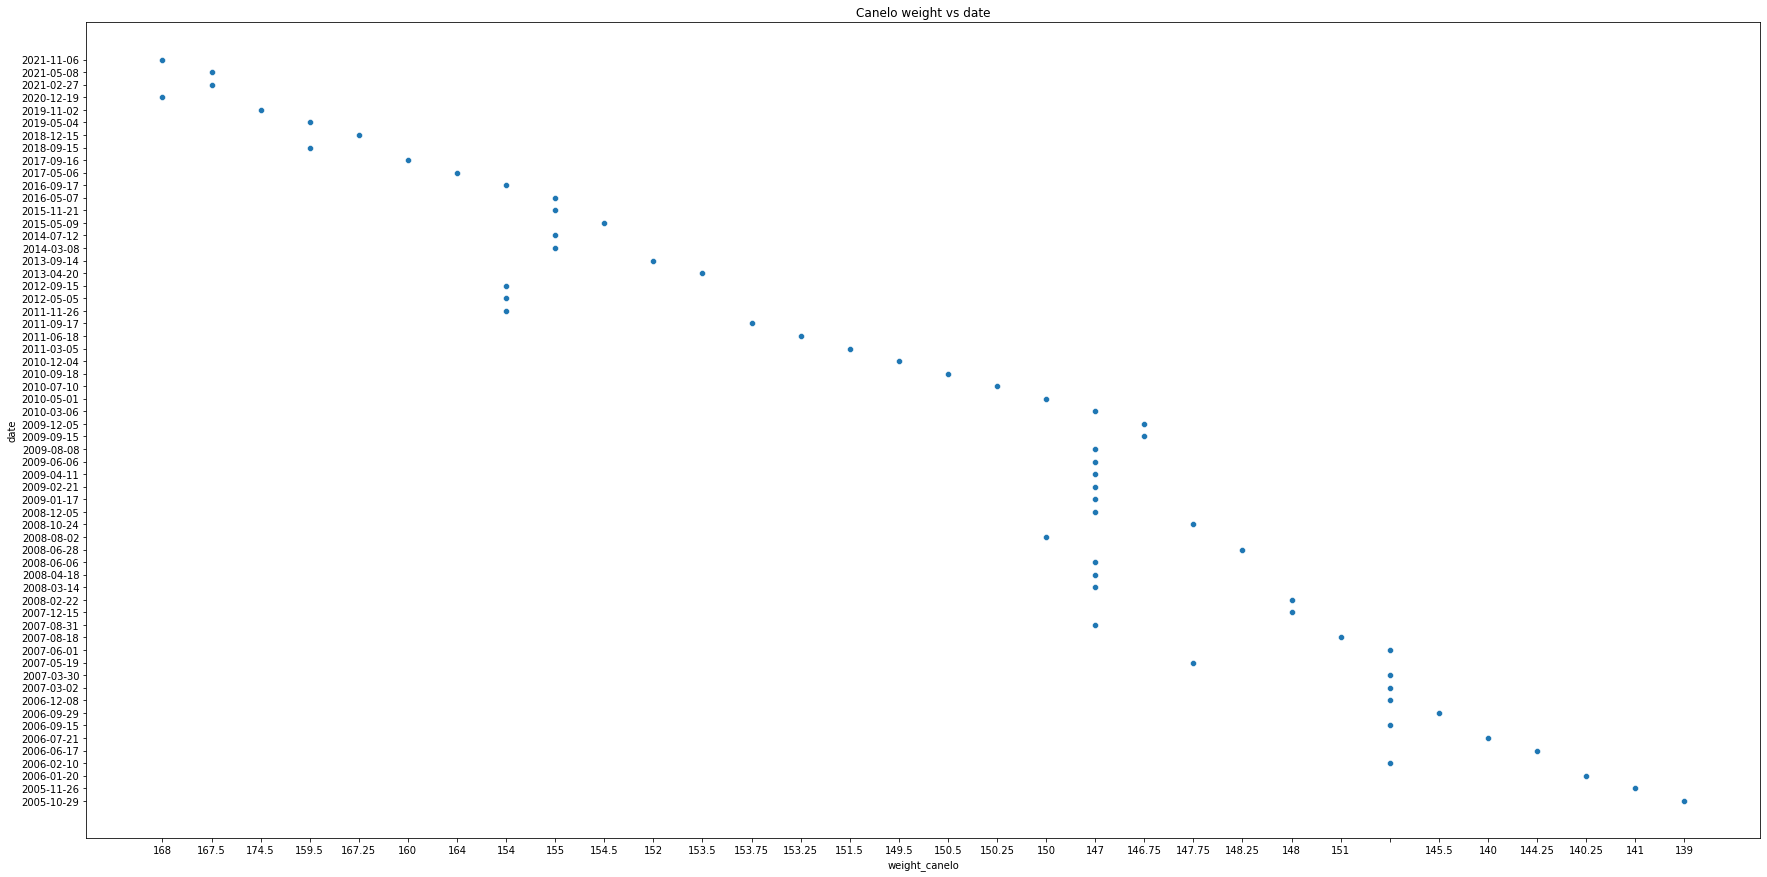

In [22]:
# We can see how Canelo has been going to different weight divisions through the years

fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_canelo_fights, x = "weight_canelo", y = "date", ax=ax)
plt.title("Canelo weight vs date")